In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Name
adam      AxesSubplot(0.125,0.125;0.775x0.755)
farley    AxesSubplot(0.125,0.125;0.775x0.755)
joe       AxesSubplot(0.125,0.125;0.775x0.755)
matt      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zscore, dtype: object

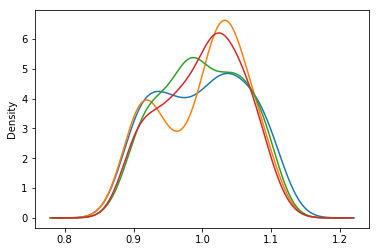

In [13]:
np.random.seed([3,1415])
df = pd.DataFrame(dict(
        Name='matt joe adam farley'.split() * 100,
        Seconds=np.random.randint(4000, 5000, 400)
    ))

df['Zscore'] = df.groupby('Name').Seconds.apply(lambda x: x.div(x.mean()))

df.groupby('Name').Zscore.plot.kde()


4 <pandas.core.groupby.groupby.SeriesGroupBy object at 0x7fa0ce32c240>


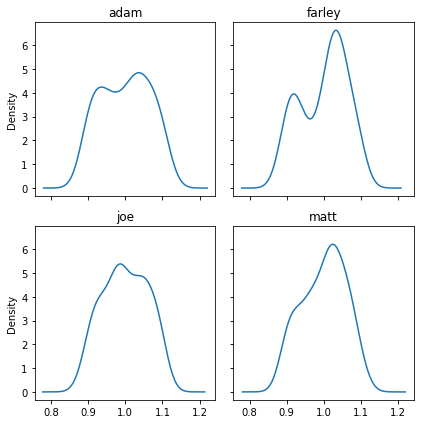

In [14]:
# split out plots
g = df.groupby('Name').Zscore
n = g.ngroups
print(n, g)
fig, axes = plt.subplots(n // 2, 2, figsize=(6, 6), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    group.plot.kde(title=name, ax=axes[r, c])
fig.tight_layout()



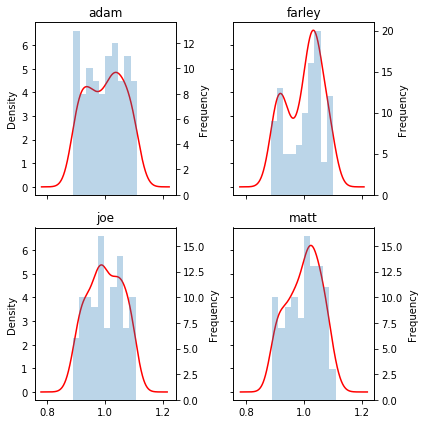

In [15]:
# kde + hist
g = df.groupby('Name').Zscore
n = g.ngroups
fig, axes = plt.subplots(n // 2, 2, figsize=(6, 6), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    a1 = axes[r, c]
    a2 = a1.twinx()
    group.plot.hist(ax=a2, alpha=.3)
    group.plot.kde(title=name, ax=a1, c='r')
fig.tight_layout()
